In [1]:
!pip install mlxtend
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving book.csv to book.csv


In [3]:
data = pd.read_csv('/content/book.csv')

In [4]:
data.head()

ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  ItalCook  \
0         0         1        0         1       0       0        1         0   
1         1         0        0         0       0       0        0         0   
2         0         0        0         0       0       0        0         0   
3         1         1        1         0       1       0        1         0   
4         0         0        1         0       0       0        1         0   

   ItalAtlas  ItalArt  Florence  
0          0        0         0  
1          0        0         0  
2          0        0         0  
3          0        0         0  
4          0        0         0

In [5]:
data.shape

(2000, 11)

In [6]:
data.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [8]:
from mlxtend.frequent_patterns import apriori,association_rules

In [11]:
frequent_itemsets = apriori(data,min_support=0.010,use_colnames=True)
frequent_itemsets

support                                           itemsets
0     0.4230                                         (ChildBks)
1     0.2475                                         (YouthBks)
2     0.4310                                          (CookBks)
3     0.2820                                         (DoItYBks)
4     0.2145                                           (RefBks)
..       ...                                                ...
589   0.0125  (ItalAtlas, ArtBks, CookBks, ItalCook, RefBks,...
590   0.0145  (YouthBks, GeogBks, ArtBks, CookBks, ChildBks,...
591   0.0105  (GeogBks, ArtBks, CookBks, ChildBks, ItalCook,...
592   0.0100  (GeogBks, ArtBks, CookBks, ChildBks, ItalCook,...
593   0.0110  (ItalAtlas, ArtBks, CookBks, ChildBks, ItalCoo...

[594 rows x 2 columns]

In [12]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules

antecedents                                        consequents  \
0      (YouthBks)                                         (ChildBks)   
1      (ChildBks)                                         (YouthBks)   
2       (CookBks)                                         (ChildBks)   
3      (ChildBks)                                          (CookBks)   
4      (DoItYBks)                                         (ChildBks)   
...           ...                                                ...   
11097   (CookBks)  (ItalAtlas, ArtBks, ChildBks, ItalCook, RefBks...   
11098  (ChildBks)  (ItalAtlas, ArtBks, CookBks, ItalCook, RefBks,...   
11099  (ItalCook)  (ItalAtlas, ArtBks, ChildBks, CookBks, RefBks,...   
11100    (RefBks)  (ItalAtlas, ArtBks, ChildBks, CookBks, ItalCoo...   
11101   (ItalArt)  (ItalAtlas, ArtBks, ChildBks, CookBks, ItalCoo...   

       antecedent support  consequent support  support  confidence       lift  \
0                  0.2475              0.4230    0.165    0.666667   1.576044   
1                  0.4230              0.2475    0.165    0.390071   1.576044   
2                  0.4310              0.4230    0.256    0.593968   1.404179   
3                  0.4230              0.4310    0.256    0.605201   1.404179   
4                  0.2820              0.4230    0.184    0.652482   1.542511   
...                   ...                 ...      ...         ...        ...   
11097              0.4310              0.0110    0.011    0.025522   2.320186   
11098              0.4230              0.0125    0.011    0.026005   2.080378   
11099              0.1135              0.0115    0.011    0.096916   8.427504   
11100              0.2145              0.0110    0.011    0.051282   4.662005   
11101              0.0485              0.0115    0.011    0.226804  19.722098   

       leverage  conviction  zhangs_metric  
0      0.060308    1.731000       0.485714  
1      0.060308    1.233750       0.633449  
2      0.073687    1.421069       0.505870  
3      0.073687    1.441240       0.498856  
4      0.064714    1.660347       0.489842  
...         ...         ...            ...  
11097  0.006259    1.014902       1.000000  
11098  0.005712    1.013865       0.900032  
11099  0.009695    1.094583       0.994180  
11100  0.008640    1.042459       1.000000  
11101  0.010442    1.278460       0.997683  

[11102 rows x 10 columns]

In [13]:
rules[(rules['lift']>=1.1) & (rules['confidence']>=0.5)]

antecedents  \
0                       (YouthBks)   
2                        (CookBks)   
3                       (ChildBks)   
4                       (DoItYBks)   
7                         (RefBks)   
...                            ...   
11072  (ItalArt, ChildBks, RefBks)   
11073  (ItalArt, ItalCook, RefBks)   
11074          (ArtBks, ItalAtlas)   
11079         (ItalArt, ItalAtlas)   
11094            (ItalArt, RefBks)   

                                            consequents  antecedent support  \
0                                            (ChildBks)              0.2475   
2                                            (ChildBks)              0.4310   
3                                             (CookBks)              0.4230   
4                                            (ChildBks)              0.2820   
7                                            (ChildBks)              0.2145   
...                                                 ...                 ...   
11072            (ArtBks, ItalCook, CookBks, ItalAtlas)              0.0180   
11073            (ArtBks, ChildBks, CookBks, ItalAtlas)              0.0160   
11074    (CookBks, ChildBks, ItalCook, RefBks, ItalArt)              0.0180   
11079     (ArtBks, CookBks, ChildBks, ItalCook, RefBks)              0.0165   
11094  (ItalAtlas, ArtBks, ChildBks, CookBks, ItalCook)              0.0200   

       consequent support  support  confidence       lift  leverage  \
0                  0.4230   0.1650    0.666667   1.576044  0.060308   
2                  0.4230   0.2560    0.593968   1.404179  0.073687   
3                  0.4310   0.2560    0.605201   1.404179  0.073687   
4                  0.4230   0.1840    0.652482   1.542511  0.064714   
7                  0.4230   0.1515    0.706294   1.669725  0.060767   
...                   ...      ...         ...        ...       ...   
11072              0.0130   0.0110    0.611111  47.008547  0.010766   
11073              0.0125   0.0110    0.687500  55.000000  0.010800   
11074              0.0145   0.0110    0.611111  42.145594  0.010739   
11079              0.0220   0.0110    0.666667  30.303030  0.010637   
11094              0.0115   0.0110    0.550000  47.826087  0.010770   

       conviction  zhangs_metric  
0        1.731000       0.485714  
2        1.421069       0.505870  
3        1.441240       0.498856  
4        1.660347       0.489842  
7        1.964548       0.510629  
...           ...            ...  
11072    2.538000       0.996667  
11073    3.160000       0.997783  
11074    2.534143       0.994168  
11079    2.934000       0.983223  
11094    2.196667       0.999072  

[3272 rows x 10 columns]

In [14]:
frequent_itemsets = apriori(data,min_support=0.050,use_colnames=True)
frequent_itemsets

support                                          itemsets
0    0.4230                                        (ChildBks)
1    0.2475                                        (YouthBks)
2    0.4310                                         (CookBks)
3    0.2820                                        (DoItYBks)
4    0.2145                                          (RefBks)
..      ...                                               ...
95   0.0600            (DoItYBks, YouthBks, GeogBks, CookBks)
96   0.0560              (ArtBks, YouthBks, GeogBks, CookBks)
97   0.0650              (DoItYBks, GeogBks, ArtBks, CookBks)
98   0.0510  (YouthBks, GeogBks, CookBks, ChildBks, DoItYBks)
99   0.0535    (GeogBks, ArtBks, CookBks, ChildBks, DoItYBks)

[100 rows x 2 columns]

In [15]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules

antecedents                             consequents  antecedent support  \
0    (YouthBks)                              (ChildBks)              0.2475   
1    (ChildBks)                              (YouthBks)              0.4230   
2     (CookBks)                              (ChildBks)              0.4310   
3    (ChildBks)                               (CookBks)              0.4230   
4    (DoItYBks)                              (ChildBks)              0.2820   
..          ...                                     ...                 ...   
657   (GeogBks)   (ArtBks, DoItYBks, CookBks, ChildBks)              0.2760   
658    (ArtBks)  (DoItYBks, GeogBks, CookBks, ChildBks)              0.2410   
659   (CookBks)   (DoItYBks, ArtBks, GeogBks, ChildBks)              0.4310   
660  (ChildBks)    (DoItYBks, ArtBks, GeogBks, CookBks)              0.4230   
661  (DoItYBks)    (ArtBks, GeogBks, CookBks, ChildBks)              0.2820   

     consequent support  support  confidence      lift  leverage  conviction  \
0                0.4230   0.1650    0.666667  1.576044  0.060308    1.731000   
1                0.2475   0.1650    0.390071  1.576044  0.060308    1.233750   
2                0.4230   0.2560    0.593968  1.404179  0.073687    1.421069   
3                0.4310   0.2560    0.605201  1.404179  0.073687    1.441240   
4                0.4230   0.1840    0.652482  1.542511  0.064714    1.660347   
..                  ...      ...         ...       ...       ...         ...   
657              0.0820   0.0535    0.193841  2.363910  0.030868    1.138733   
658              0.0890   0.0535    0.221992  2.494289  0.032051    1.170939   
659              0.0595   0.0535    0.124130  2.086217  0.027856    1.073789   
660              0.0650   0.0535    0.126478  1.945808  0.026005    1.070379   
661              0.0835   0.0535    0.189716  2.272052  0.029953    1.131085   

     zhangs_metric  
0         0.485714  
1         0.633449  
2         0.505870  
3         0.498856  
4         0.489842  
..             ...  
657       0.796923  
658       0.789307  
659       0.915050  
660       0.842417  
661       0.779762  

[662 rows x 10 columns]

In [16]:
rules[(rules['lift']>= 1.5) & (rules['confidence'] >= 0.6)]

antecedents          consequents  \
0                                (YouthBks)           (ChildBks)   
4                                (DoItYBks)           (ChildBks)   
7                                  (RefBks)           (ChildBks)   
8                                  (ArtBks)           (ChildBks)   
10                                (GeogBks)           (ChildBks)   
..                                      ...                  ...   
633    (DoItYBks, ArtBks, GeogBks, CookBks)           (ChildBks)   
634   (DoItYBks, ArtBks, GeogBks, ChildBks)            (CookBks)   
635  (DoItYBks, GeogBks, CookBks, ChildBks)             (ArtBks)   
636   (ArtBks, DoItYBks, CookBks, ChildBks)            (GeogBks)   
639             (DoItYBks, ArtBks, GeogBks)  (CookBks, ChildBks)   

     antecedent support  consequent support  support  confidence      lift  \
0                0.2475               0.423   0.1650    0.666667  1.576044   
4                0.2820               0.423   0.1840    0.652482  1.542511   
7                0.2145               0.423   0.1515    0.706294  1.669725   
8                0.2410               0.423   0.1625    0.674274  1.594028   
10               0.2760               0.423   0.1950    0.706522  1.670264   
..                  ...                 ...      ...         ...       ...   
633              0.0650               0.423   0.0535    0.823077  1.945808   
634              0.0595               0.431   0.0535    0.899160  2.086217   
635              0.0890               0.241   0.0535    0.601124  2.494289   
636              0.0820               0.276   0.0535    0.652439  2.363910   
639              0.0730               0.256   0.0535    0.732877  2.862800   

     leverage  conviction  zhangs_metric  
0    0.060308    1.731000       0.485714  
4    0.064714    1.660347       0.489842  
7    0.060767    1.964548       0.510629  
8    0.060557    1.771427       0.490986  
10   0.078252    1.966074       0.554271  
..        ...         ...            ...  
633  0.026005    3.261304       0.519866  
634  0.027856    5.642583       0.553603  
635  0.032051    1.902845       0.657612  
636  0.030868    2.083088       0.628510  
639  0.034812    2.785231       0.701933  

[134 rows x 10 columns]

In [18]:
frequent_itemsets = apriori(data,min_support=.1,use_colnames=True)
frequent_itemsets

support                       itemsets
0    0.4230                     (ChildBks)
1    0.2475                     (YouthBks)
2    0.4310                      (CookBks)
3    0.2820                     (DoItYBks)
4    0.2145                       (RefBks)
5    0.2410                       (ArtBks)
6    0.2760                      (GeogBks)
7    0.1135                     (ItalCook)
8    0.1085                     (Florence)
9    0.1650           (YouthBks, ChildBks)
10   0.2560            (CookBks, ChildBks)
11   0.1840           (DoItYBks, ChildBks)
12   0.1515             (ChildBks, RefBks)
13   0.1625             (ArtBks, ChildBks)
14   0.1950            (GeogBks, ChildBks)
15   0.1620            (YouthBks, CookBks)
16   0.1155           (DoItYBks, YouthBks)
17   0.1010             (ArtBks, YouthBks)
18   0.1205            (GeogBks, YouthBks)
19   0.1875            (DoItYBks, CookBks)
20   0.1525              (CookBks, RefBks)
21   0.1670              (ArtBks, CookBks)
22   0.1925             (GeogBks, CookBks)
23   0.1135            (ItalCook, CookBks)
24   0.1055             (DoItYBks, RefBks)
25   0.1235             (DoItYBks, ArtBks)
26   0.1325            (DoItYBks, GeogBks)
27   0.1105              (GeogBks, RefBks)
28   0.1275              (ArtBks, GeogBks)
29   0.1290  (YouthBks, CookBks, ChildBks)
30   0.1460  (DoItYBks, CookBks, ChildBks)
31   0.1225    (CookBks, ChildBks, RefBks)
32   0.1265    (ArtBks, CookBks, ChildBks)
33   0.1495   (GeogBks, CookBks, ChildBks)
34   0.1045  (DoItYBks, GeogBks, ChildBks)
35   0.1020    (ArtBks, GeogBks, ChildBks)
36   0.1015    (DoItYBks, ArtBks, CookBks)
37   0.1085   (DoItYBks, GeogBks, CookBks)
38   0.1035     (ArtBks, GeogBks, CookBks)

In [19]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules

antecedents         consequents  antecedent support  \
0           (YouthBks)          (ChildBks)              0.2475   
1           (ChildBks)          (YouthBks)              0.4230   
2            (CookBks)          (ChildBks)              0.4310   
3           (ChildBks)           (CookBks)              0.4230   
4           (DoItYBks)          (ChildBks)              0.2820   
..                 ...                 ...                 ...   
95   (ArtBks, CookBks)           (GeogBks)              0.1670   
96  (GeogBks, CookBks)            (ArtBks)              0.1925   
97            (ArtBks)  (GeogBks, CookBks)              0.2410   
98           (GeogBks)   (ArtBks, CookBks)              0.2760   
99           (CookBks)   (ArtBks, GeogBks)              0.4310   

    consequent support  support  confidence      lift  leverage  conviction  \
0               0.4230   0.1650    0.666667  1.576044  0.060308    1.731000   
1               0.2475   0.1650    0.390071  1.576044  0.060308    1.233750   
2               0.4230   0.2560    0.593968  1.404179  0.073687    1.421069   
3               0.4310   0.2560    0.605201  1.404179  0.073687    1.441240   
4               0.4230   0.1840    0.652482  1.542511  0.064714    1.660347   
..                 ...      ...         ...       ...       ...         ...   
95              0.2760   0.1035    0.619760  2.245509  0.057408    1.904063   
96              0.2410   0.1035    0.537662  2.230964  0.057107    1.641657   
97              0.1925   0.1035    0.429461  2.230964  0.057107    1.415327   
98              0.1670   0.1035    0.375000  2.245509  0.057408    1.332800   
99              0.1275   0.1035    0.240139  1.883445  0.048547    1.148237   

    zhangs_metric  
0        0.485714  
1        0.633449  
2        0.505870  
3        0.498856  
4        0.489842  
..            ...  
95       0.665866  
96       0.683298  
97       0.726961  
98       0.766114  
99       0.824355  

[100 rows x 10 columns]

In [20]:
rules[(rules['lift']>= 1.5) & (rules['confidence'] >= 0.4)]

antecedents         consequents  antecedent support  \
0           (YouthBks)          (ChildBks)              0.2475   
4           (DoItYBks)          (ChildBks)              0.2820   
5           (ChildBks)          (DoItYBks)              0.4230   
7             (RefBks)          (ChildBks)              0.2145   
8             (ArtBks)          (ChildBks)              0.2410   
..                 ...                 ...                 ...   
90  (GeogBks, CookBks)          (DoItYBks)              0.1925   
94   (ArtBks, GeogBks)           (CookBks)              0.1275   
95   (ArtBks, CookBks)           (GeogBks)              0.1670   
96  (GeogBks, CookBks)            (ArtBks)              0.1925   
97            (ArtBks)  (GeogBks, CookBks)              0.2410   

    consequent support  support  confidence      lift  leverage  conviction  \
0               0.4230   0.1650    0.666667  1.576044  0.060308    1.731000   
4               0.4230   0.1840    0.652482  1.542511  0.064714    1.660347   
5               0.2820   0.1840    0.434988  1.542511  0.064714    1.270770   
7               0.4230   0.1515    0.706294  1.669725  0.060767    1.964548   
8               0.4230   0.1625    0.674274  1.594028  0.060557    1.771427   
..                 ...      ...         ...       ...       ...         ...   
90              0.2820   0.1085    0.563636  1.998711  0.054215    1.645417   
94              0.4310   0.1035    0.811765  1.883445  0.048547    3.022812   
95              0.2760   0.1035    0.619760  2.245509  0.057408    1.904063   
96              0.2410   0.1035    0.537662  2.230964  0.057107    1.641657   
97              0.1925   0.1035    0.429461  2.230964  0.057107    1.415327   

    zhangs_metric  
0        0.485714  
4        0.489842  
5        0.609543  
7        0.510629  
8        0.490986  
..            ...  
90       0.618796  
94       0.537602  
95       0.665866  
96       0.683298  
97       0.726961  

[68 rows x 10 columns]

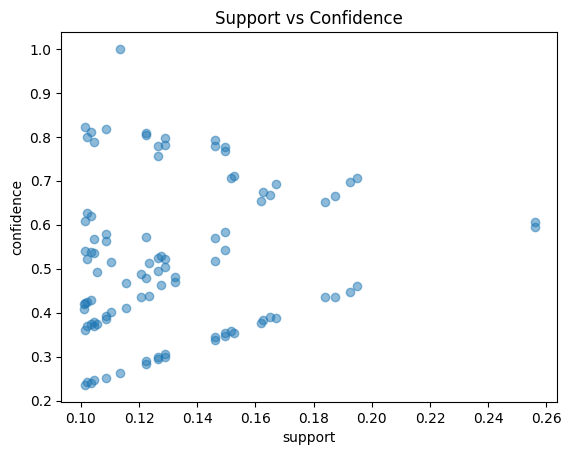

In [21]:
plt.scatter(rules['support'],rules['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

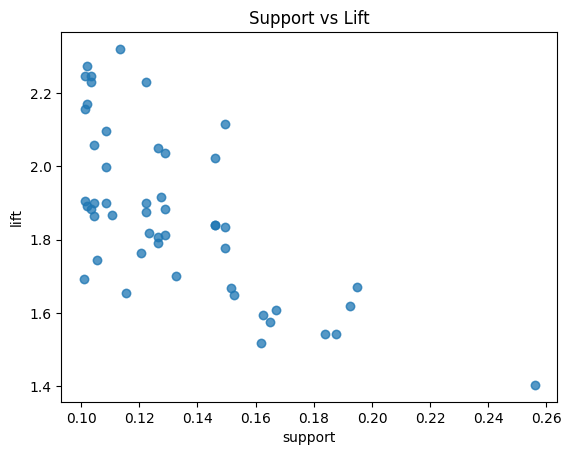

In [22]:
plt.scatter(rules['support'],rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

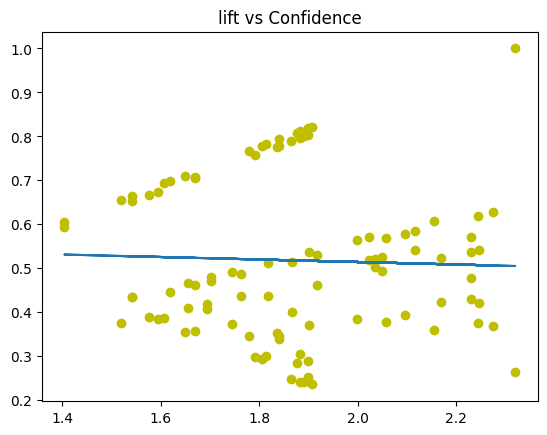

In [23]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.title('lift vs Confidence')
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],
 fit_fn(rules['lift']))